# Project: Youtube Adview Prediction

## Data Description
The file train.csv contains metrics and other details of about 15000 youtube videos. The metrics include number of views, likes, dislikes, comments and apart from that published date, duration and category are also included.

## Context :
Youtube advertisers pay content creators based on adviews and clicks for the goods and services being marketed. They want to estimate the adview based on other metrics like comments, likes etc. The problem statement is therefore to train various regression models and choose the best one to predict the number of adviews. The data needs to be refined and cleaned before feeding in the algorithms for better results.

## Attribute Information
- 'vidid' : Unique Identification ID for each video
- 'adview' : The number of adviews for each video
- 'views' : The number of unique views for each video
- 'likes' : The number of likes for each video
- 'dislikes' : The number of likes for each video
- 'comment' : The number of unique comments for each video
- 'published' : The data of uploading the video
- 'duration' : The duration of the video (in min. and seconds)
- 'category' : Category niche of each of the video

## Objective
To build a machine learning regression to predict youtube adview count based on other youtube metrics.

## Steps and Tasks

In [1]:
### 1. Import the datasets and libraries, check shape and datatype.

In [2]:
import numpy as np
import pandas as pd

In [3]:
df_train = pd.read_csv("train_lyst1720633807653.csv")
df_test = pd.read_csv("test_lyst1720633807653.csv")

In [4]:
df_train.shape

(14999, 9)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   vidid      14999 non-null  object
 1   adview     14999 non-null  int64 
 2   views      14999 non-null  object
 3   likes      14999 non-null  object
 4   dislikes   14999 non-null  object
 5   comment    14999 non-null  object
 6   published  14999 non-null  object
 7   duration   14999 non-null  object
 8   category   14999 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.0+ MB


In [6]:
df_train.describe()

,adview
count,1.499900e+04
mean,2.107791e+03
std,5.237711e+04
min,1.000000e+00
25%,1.000000e+00
50%,2.000000e+00
75%,6.000000e+00
max,5.429665e+06


In [7]:
df_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [8]:
### 3. Clean the dataset by removing missing values and other things

In [9]:
### 4. Transform attributes into numerical values and other necessary transformations

In [10]:
# Convert views, likes, dislikes, and comment to numeric, handling non-numeric values
df_train['views'] = pd.to_numeric(df_train['views'], errors='coerce')
df_train['likes'] = pd.to_numeric(df_train['likes'], errors='coerce')
df_train['dislikes'] = pd.to_numeric(df_train['dislikes'], errors='coerce')
df_train['comment'] = pd.to_numeric(df_train['comment'], errors='coerce')

# Apply log transformation to skewed features and target variable
df_train['views'] = np.log1p(df_train['views'])
df_train['likes'] = np.log1p(df_train['likes'])
df_train['dislikes'] = np.log1p(df_train['dislikes'])
df_train['comment'] = np.log1p(df_train['comment'])
df_train['adview'] = np.log1p(df_train['adview'])

In [11]:
# Treat missing values
df_train.fillna(0,inplace=True)

In [12]:
# Extract features from the 'published' date
df_train['published'] = pd.to_datetime(df_train['published'], errors='coerce')
df_train['publish_year'] = df_train['published'].dt.year
df_train['publish_month'] = df_train['published'].dt.month
df_train['publish_day'] = df_train['published'].dt.day
df_train['publish_dayofweek'] = df_train['published'].dt.dayofweek
df_train['publish_hour'] = df_train['published'].dt.hour

In [13]:
import isodate

In [14]:
def parse_duration(duration):
    try:
        return isodate.parse_duration(duration).total_seconds()
    except:
        return 0

df_train['duration'] = df_train['duration'].apply(parse_duration)


In [15]:
df_train=pd.get_dummies(df_train,columns=['category'])

In [16]:
df_train_cleaned = df_train.drop(['vidid','published'],axis=1)

In [17]:
df_train_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   adview             14999 non-null  float64
 1   views              14999 non-null  float64
 2   likes              14999 non-null  float64
 3   dislikes           14999 non-null  float64
 4   comment            14999 non-null  float64
 5   duration           14999 non-null  float64
 6   publish_year       14999 non-null  int32  
 7   publish_month      14999 non-null  int32  
 8   publish_day        14999 non-null  int32  
 9   publish_dayofweek  14999 non-null  int32  
 10  publish_hour       14999 non-null  int32  
 11  category_A         14999 non-null  bool   
 12  category_B         14999 non-null  bool   
 13  category_C         14999 non-null  bool   
 14  category_D         14999 non-null  bool   
 15  category_E         14999 non-null  bool   
 16  category_F         149

In [18]:
### 2. Visualise the dataset using plotting using heatmaps and plots. You can study data distributions for each attribute as well.

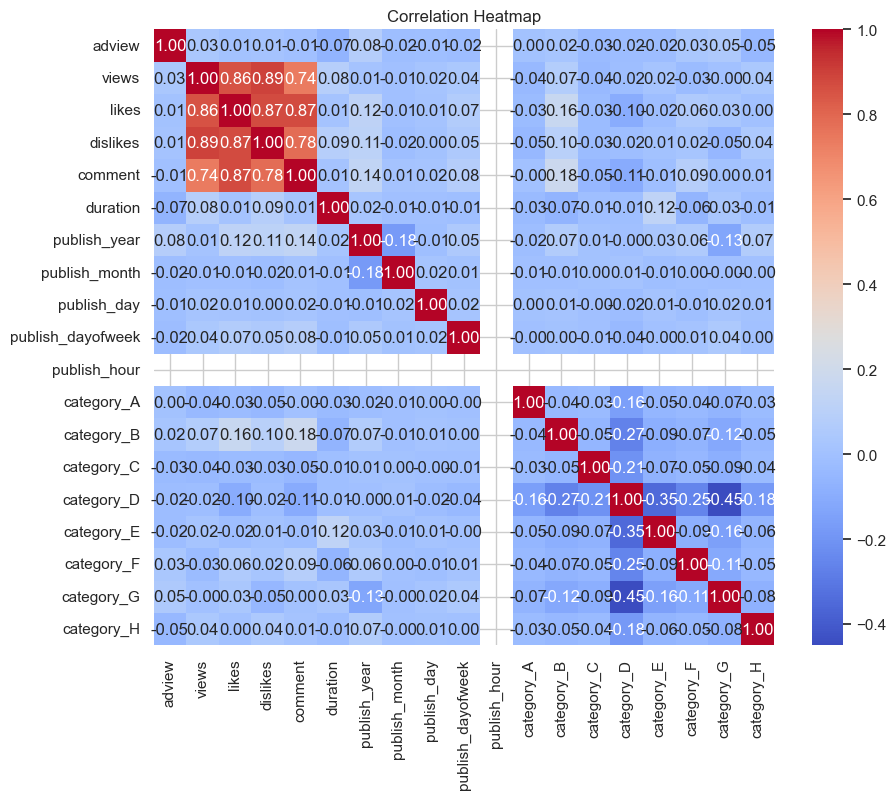

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a correlation heatmap
plt.figure(figsize=(10, 8))
corr_matrix = df_train_cleaned.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

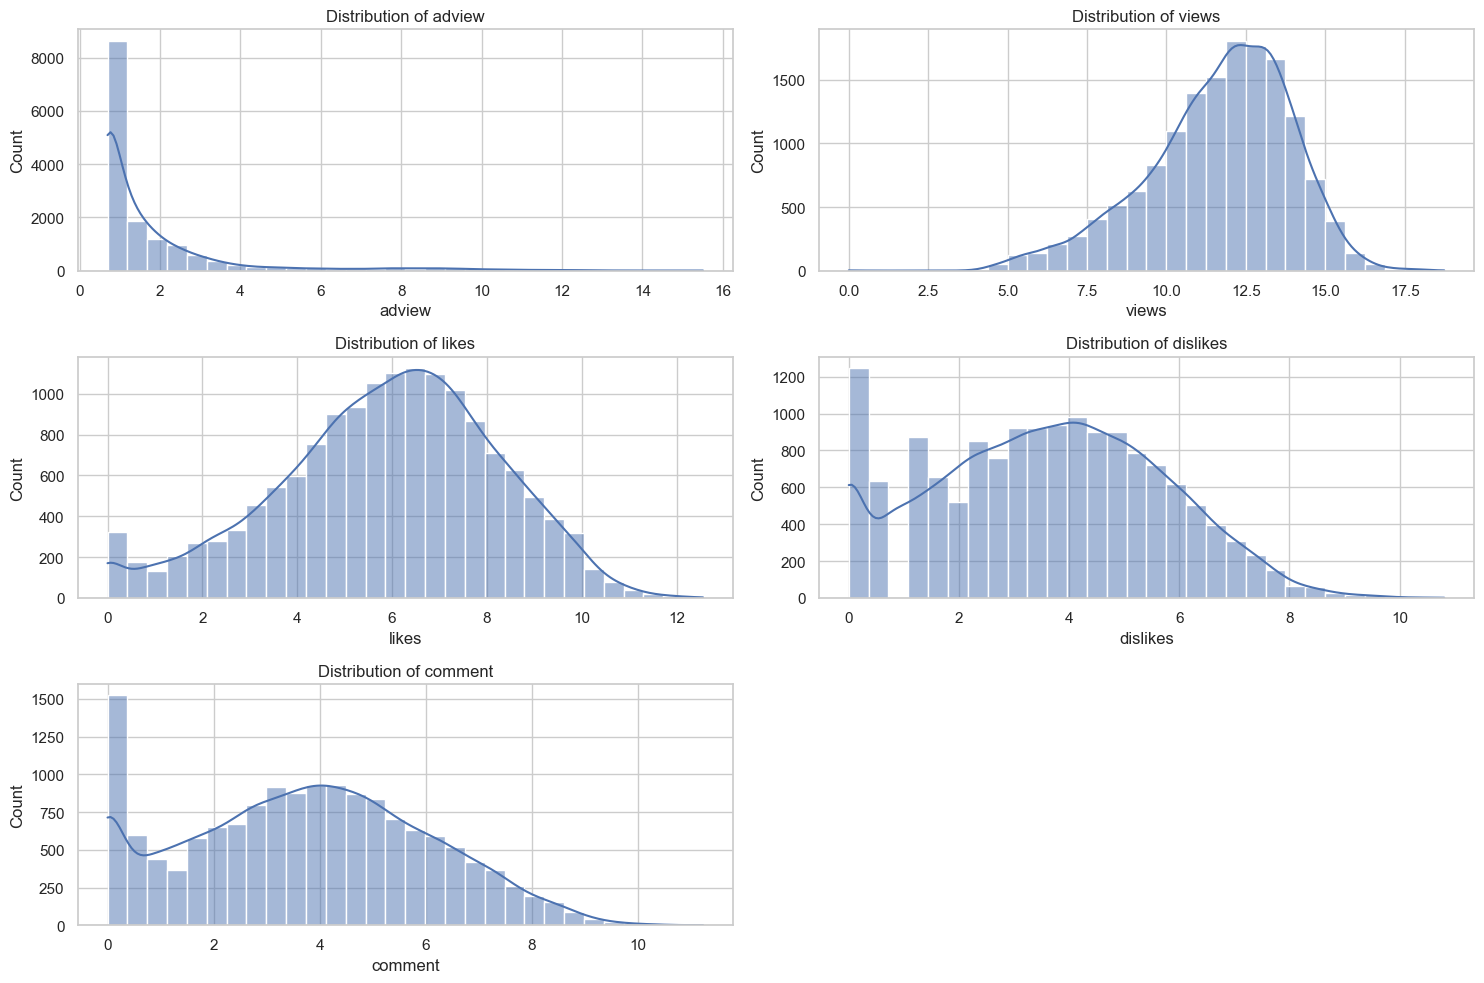

In [20]:
# Create distribution plots for numeric attributes
numeric_columns = ['adview', 'views', 'likes', 'dislikes', 'comment']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns):
    plt.subplot(3, 2, i + 1)
    sns.histplot(df_train_cleaned[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


In [21]:
### 5. Normalise your data and split the data into training, validation and test set in the appropriate ratio.

In [22]:
X=df_train_cleaned.drop('adview',axis=1)
y=df_train_cleaned['adview']

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [24]:
# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Display the shapes of the resulting datasets
print(f"Training set shape: {X_train.shape}, Validation set shape: {X_val.shape}, Test set shape: {X_test.shape}")

Training set shape: (10499, 18), Validation set shape: (2250, 18), Test set shape: (2250, 18)


In [26]:
### 6. Use linear regression, Support Vector Regressor for training and get errors

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
# Train a Linear Regression model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

# Predict on validation set
y_val_pred_lr = linear_regressor.predict(X_val)

# Evaluate the model
mse_lr = mean_squared_error(y_val, y_val_pred_lr)
r2_lr = r2_score(y_val, y_val_pred_lr)

print(f"Linear Regression - MSE: {mse_lr}, R²: {r2_lr}")


Linear Regression - MSE: 3.5250881986532416, R²: 0.023849879589500467


In [29]:
# Train a Support Vector Regressor model
svr_regressor = SVR()
svr_regressor.fit(X_train, y_train)

# Predict on validation set
y_val_pred_svr = svr_regressor.predict(X_val)

# Evaluate the model
mse_svr = mean_squared_error(y_val, y_val_pred_svr)
r2_svr = r2_score(y_val, y_val_pred_svr)

print(f"Support Vector Regressor - MSE: {mse_svr}, R²: {r2_svr}")


Support Vector Regressor - MSE: 3.642595987212887, R²: -0.008689800409284354


In [30]:
### 7. Use Decision Tree Regressor and Random Forest Regressors.

In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [32]:
# Train a Decision Tree Regressor model
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)

# Predict on validation set
y_val_pred_dt = dt_regressor.predict(X_val)

# Evaluate the model
mse_dt = mean_squared_error(y_val, y_val_pred_dt)
r2_dt = r2_score(y_val, y_val_pred_dt)

print(f"Decision Tree Regressor - MSE: {mse_dt}, R²: {r2_dt}")


Decision Tree Regressor - MSE: 5.327523574357967, R²: -0.4752716770565171


In [33]:
# Train a Random Forest Regressor model
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train, y_train)

# Predict on validation set
y_val_pred_rf = rf_regressor.predict(X_val)

# Evaluate the model
mse_rf = mean_squared_error(y_val, y_val_pred_rf)
r2_rf = r2_score(y_val, y_val_pred_rf)

print(f"Random Forest Regressor - MSE: {mse_rf}, R²: {r2_rf}")


Random Forest Regressor - MSE: 2.700185087951412, R²: 0.2522779998124849


In [34]:
### 8. Build an artificial neural network and train it with different layers and hyperparameters. Experiment a little. Use keras.

In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [36]:
# Define the model
ann_model = Sequential()

# Input layer
ann_model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))

# Hidden layers
ann_model.add(Dense(units=64, activation='relu'))
ann_model.add(Dropout(0.2))
ann_model.add(Dense(units=32, activation='relu'))
ann_model.add(Dropout(0.2))

# Output layer
ann_model.add(Dense(units=1, activation='linear'))

# Compile the model
ann_model.compile(optimizer='adam', loss='mean_squared_error')

In [37]:
# Train the model
history = ann_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

# Predict on validation set
y_val_pred_ann = ann_model.predict(X_val)

# Evaluate the model
mse_ann = mean_squared_error(y_val, y_val_pred_ann)
r2_ann = r2_score(y_val, y_val_pred_ann)
print(f"Artificial Neural Network - MSE: {mse_ann}, R²: {r2_ann}")

Epoch 1/50
329/329 [==============================] - 2s 3ms/step - loss: 3.7934 - val_loss: 3.3776
Epoch 2/50
329/329 [==============================] - 1s 2ms/step - loss: 3.5069 - val_loss: 3.2247
Epoch 3/50
329/329 [==============================] - 1s 2ms/step - loss: 3.4050 - val_loss: 3.2155
Epoch 4/50
329/329 [==============================] - 1s 2ms/step - loss: 3.3593 - val_loss: 3.1363
Epoch 5/50
329/329 [==============================] - 1s 2ms/step - loss: 3.3149 - val_loss: 3.0834
Epoch 6/50
329/329 [==============================] - 1s 2ms/step - loss: 3.2719 - val_loss: 3.0943
Epoch 7/50
329/329 [==============================] - 1s 2ms/step - loss: 3.2325 - val_loss: 3.0041
Epoch 8/50
329/329 [==============================] - 1s 2ms/step - loss: 3.1782 - val_loss: 2.9575
Epoch 9/50
329/329 [==============================] - 1s 2ms/step - loss: 3.1684 - val_loss: 3.0037
Epoch 10/50
329/329 [==============================] - 1s 2ms/step - loss: 3.1127 - val_loss: 2.9279

In [38]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# RandomizedSearchCV for Random Forest
rf_random = RandomizedSearchCV(estimator=rf_regressor, param_distributions=param_grid_rf, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(X_train, y_train)

# Evaluate the best model
best_rf = rf_random.best_estimator_
y_val_pred_best_rf = best_rf.predict(X_val)
mse_best_rf = mean_squared_error(y_val, y_val_pred_best_rf)
r2_best_rf = r2_score(y_val, y_val_pred_best_rf)
print(f"Best Random Forest Regressor - MSE: {mse_best_rf}, R²: {r2_best_rf}")


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Random Forest Regressor - MSE: 2.6752845588618763, R²: 0.25917333209901383


In [39]:
from xgboost import XGBRegressor

# Train a Gradient Boosting Regressor
xgb_regressor = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_regressor.fit(X_train, y_train)

# Predict on validation set
y_val_pred_xgb = xgb_regressor.predict(X_val)

# Evaluate the model
mse_xgb = mean_squared_error(y_val, y_val_pred_xgb)
r2_xgb = r2_score(y_val, y_val_pred_xgb)
print(f"Gradient Boosting Regressor - MSE: {mse_xgb}, R²: {r2_xgb}")


Gradient Boosting Regressor - MSE: 2.792507753589718, R²: 0.22671246042714965


In [40]:
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score

def build_ann(optimizer='adam'):
    model = Sequential()
    model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

ann = KerasRegressor(model=build_ann, verbose=0)

param_grid_ann = {
    'batch_size': [16, 32, 64],
    'epochs': [50, 100],
    'optimizer': ['adam', 'rmsprop']
}

grid_ann = GridSearchCV(estimator=ann, param_grid=param_grid_ann, cv=3)
grid_ann.fit(X_train, y_train)

# Evaluate the best model
best_ann = grid_ann.best_estimator_
y_val_pred_best_ann = best_ann.predict(X_val)
mse_best_ann = mean_squared_error(y_val, y_val_pred_best_ann)
r2_best_ann = r2_score(y_val, y_val_pred_best_ann)
print(f"Best ANN - MSE: {mse_best_ann}, R²: {r2_best_ann}")


Best ANN - MSE: 2.8073708723355506, R²: 0.22259663854247647


In [41]:
### 9. Pick the best model based on error as well as generalisation.
### 10.Save your model and predict on the test set.

can you help me pick the best model based on error as well as generalisation and then pickle it?

Linear Regression - MSE: 3.5250881986532416, R²: 0.023849879589500467
Support Vector Regressor - MSE: 3.642595987212887, R²: -0.008689800409284354
Decision Tree Regressor - MSE: 5.327523574357967, R²: -0.4752716770565171
Random Forest Regressor - MSE: 2.700185087951412, R²: 0.2522779998124849
Artificial Neural Network - MSE: 2.858640313510848, R²: 0.20839935655793895


In [42]:
import pickle

# Assuming best_rf is your best Random Forest model
with open('best_rf_model.pkl', 'wb') as file:
    pickle.dump(best_rf, file)

print("Best model has been saved successfully.")


Best model has been saved successfully.


In [43]:
df_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [44]:
import pickle
# Save the column names of X_train
X_train_columns = X.columns.tolist()
with open('X_train_columns.pkl', 'wb') as file:
    pickle.dump(X_train_columns, file)

In [45]:
# Preprocess the test data (similar to training data)
import isodate
import numpy as np

def parse_duration(duration):
    try:
        return isodate.parse_duration(duration).total_seconds()
    except:
        return 0

df_test['duration'] = df_test['duration'].apply(parse_duration)

# Convert views, likes, dislikes, and comment to numeric, handling non-numeric values
df_test['views'] = pd.to_numeric(df_test['views'], errors='coerce')
df_test['likes'] = pd.to_numeric(df_test['likes'], errors='coerce')
df_test['dislikes'] = pd.to_numeric(df_test['dislikes'], errors='coerce')
df_test['comment'] = pd.to_numeric(df_test['comment'], errors='coerce')

# Apply log transformation to skewed features and target variable
df_test['views'] = np.log1p(df_test['views'])
df_test['likes'] = np.log1p(df_test['likes'])
df_test['dislikes'] = np.log1p(df_test['dislikes'])
df_test['comment'] = np.log1p(df_test['comment'])

# Extract features from the 'published' date
df_test['published'] = pd.to_datetime(df_test['published'], errors='coerce')
df_test['publish_year'] = df_test['published'].dt.year
df_test['publish_month'] = df_test['published'].dt.month
df_test['publish_day'] = df_test['published'].dt.day
df_test['publish_dayofweek'] = df_test['published'].dt.dayofweek
df_test['publish_hour'] = df_test['published'].dt.hour

# Handle missing values
# Treat missing values
df_test.fillna(0,inplace=True)

# Encode 'category' column
df_test=pd.get_dummies(df_test,columns=['category'])

df_test_cleaned = df_test.drop(['vidid','published'],axis=1)

# Ensure the test data has the same features as the training data
# Add missing dummy columns
for col in X_train_columns:
    if col not in df_test_cleaned.columns:
        df_test_cleaned[col] = 0

# Reorder columns to match training data
df_test_cleaned = df_test_cleaned[X_train_columns]

print(df_test_cleaned.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8764 entries, 0 to 8763
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   views              8764 non-null   float64
 1   likes              8764 non-null   float64
 2   dislikes           8764 non-null   float64
 3   comment            8764 non-null   float64
 4   duration           8764 non-null   float64
 5   publish_year       8764 non-null   int32  
 6   publish_month      8764 non-null   int32  
 7   publish_day        8764 non-null   int32  
 8   publish_dayofweek  8764 non-null   int32  
 9   publish_hour       8764 non-null   int32  
 10  category_A         8764 non-null   bool   
 11  category_B         8764 non-null   bool   
 12  category_C         8764 non-null   bool   
 13  category_D         8764 non-null   bool   
 14  category_E         8764 non-null   bool   
 15  category_F         8764 non-null   bool   
 16  category_G         8764 

In [46]:
# Load the saved model
with open('best_rf_model.pkl', 'rb') as file:
    loaded_rf_model = pickle.load(file)

# Make predictions on the test set
y_test_pred = loaded_rf_model.predict(df_test_cleaned)

# Save the predictions to a CSV file
df_test_cleaned['predicted_adview'] = y_test_pred
df_test_cleaned.to_csv('test_predictions.csv', index=False)

print("Predictions have been saved successfully.")

Predictions have been saved successfully.


C:\Users\janne\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [49]:
# Fit the model on the training set
loaded_rf_model.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = loaded_rf_model.predict(X_val)

# Calculate the MSE and R² on the validation set
mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

print(f"Validation MSE: {mse_val}")
print(f"Validation R²: {r2_val}")

Validation MSE: 2.6752845588618763
Validation R²: 0.25917333209901383
